In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Task 1:

### Required functions

In [2]:
# Reads the data from a file and converts them into a matrix (numpy array)
def get_data_matrix(filename):
    with open(filename, newline='') as file:
        reader = csv.reader(file, delimiter=' ')
        X = []
        for row in reader:
            X.append(np.float64(row))
    X = np.asarray(X)
    return X

# Creates a radial basis function using x_l as center point and epsilone as bandwidth
def radial_basis_functions(x_l, epsilone):
    return lambda x : np.exp(-np.linalg.norm(x_l-x)**2/epsilone)

# Transforms the data matrix X into a concatenation of several basis functions using elements as centers 
# and epsilone as bandwidth (evaluated on the data point of X)
def transforme_matrix(X, elements, epsilone):
    stack = []
    for element in elements:
        phi = radial_basis_functions(element, epsilone)
        y = [phi(x) for x in X]
        stack.append(y)
    return np.array(stack)

# Computes the distance matrix between the 2D points contained in X
def distance_matrix(X):
    D = [[np.linalg.norm(x1-x2) for x2 in X] for x1 in X]
    return np.asarray(D)

## Part 1:

### Visualise the linear data set

(1000, 2)


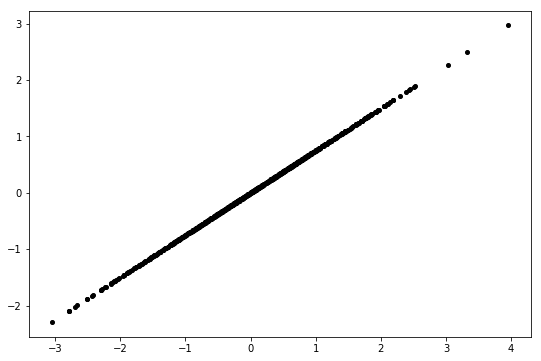

In [3]:
data = get_data_matrix('linear_function_data.txt')
print(data.shape)
plt.figure(figsize=(9,6))
plt.plot(data.T[0],data.T[1],'ko', linestyle=' ', markersize=4)

### Compute and visualise the linear approximation of the dataset

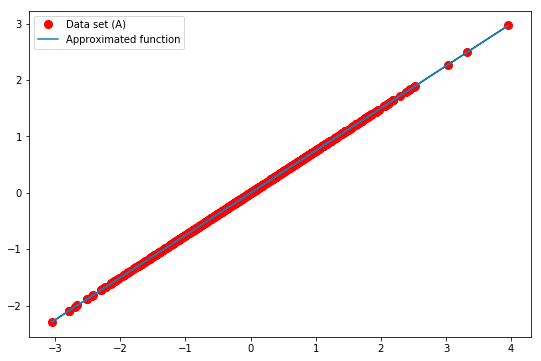

In [4]:
X = data.T[0]
A = np.vstack([X, np.ones(len(X))]).T
F = data.T[1]
m, c = np.linalg.lstsq(A,F,rcond=None)[0]
plt.figure(figsize=(9,6))
plt.plot(X,F,'ro', linestyle=' ', markersize=8)
plt.plot(X,m*X)
plt.legend(['Data set (A)', 'Approximated function'])

## Part 2:

### Visualise the non-linear data set

(1000,)


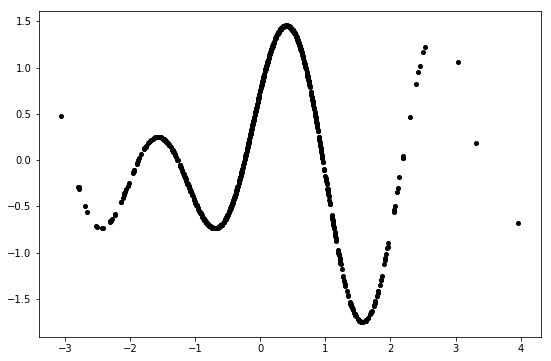

In [5]:
data = get_data_matrix('nonlinear_function_data.txt')
print(X.shape)
plt.figure(figsize=(9,6))
plt.plot(data.T[0],data.T[1],'ko', linestyle=' ', markersize=4)

### Compute and visualise the linear approximation of the dataset

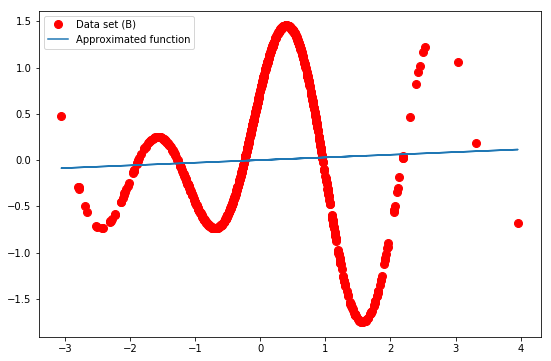

In [6]:
X = data.T[0]
A = np.vstack([X, np.ones(len(X))]).T
F = data.T[1]
m,c = np.linalg.lstsq(A,F,rcond=None)[0]
plt.figure(figsize=(9,6))
plt.plot(X,F,'ro', linestyle=' ', markersize=8)
plt.plot(X,m*X)
plt.legend(['Data set (B)', 'Approximated function'])

## Part 3:

### Compute epsilone similarly to the diffusion maps exercise

In [7]:
D = distance_matrix(data)
epsilon = 0.05 * np.max(D)
print(epsilon)

0.35540254084288914


### Visualise some radial basis functions

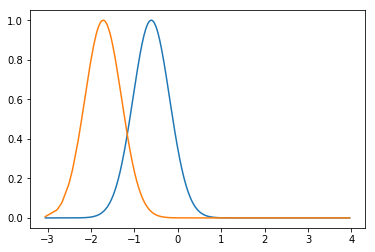

In [8]:
idx   = np.argsort(X)
r_1 = radial_basis_functions(X[1],epsilon)
r_2 = radial_basis_functions(X[500],epsilon)
y = [r_1(x) for x in X]
plt.plot(np.array(X)[idx], np.array(y)[idx])
y = [r_2(x) for x in X]
plt.plot(np.array(X)[idx], np.array(y)[idx])

### Compute and visualise the non-linear approximation of the dataset using the best values for L and epsilon (after fine-tunig)

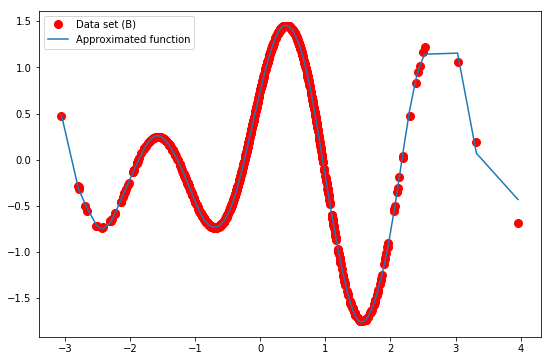

In [9]:
L = 60
elements = np.random.choice(X, L)
epsilon = 0.55
T = transforme_matrix(X, elements, epsilon).T
m= np.linalg.lstsq(T,F,rcond=None)[0]
plt.figure(figsize=(9,6))
plt.plot(X,F,'ro', linestyle=' ', markersize=8)
F_hat = T @ m
idx   = np.argsort(X)
plt.plot(np.array(X)[idx], np.array(F_hat)[idx])
plt.legend(['Data set (B)', 'Approximated function'])

# Task 2:

### Required functions

In [10]:
# Euler's method
def euler(delta, x0, A):
    return x0 + delta * (x0 @ A)

# Mean squared error between two arrays
def mean_squared_error(A,B):
    return np.square(np.subtract(A, B)).mean()

# Used for plotting the phase portraits
def phase_portrait(x, y, A):
    u = A[0][0] *x + A[1][0] *y
    v = A[0][1] *x + A[1][1] *y
    return u, v

# Euler's method with transforming step
def euler_transform(delta, x0, A, elements):
    T = transforme_matrix(x0, elements, 0.5).T
    return x0 + delta * (T @ A)

### Visualise the points for x0 and x1

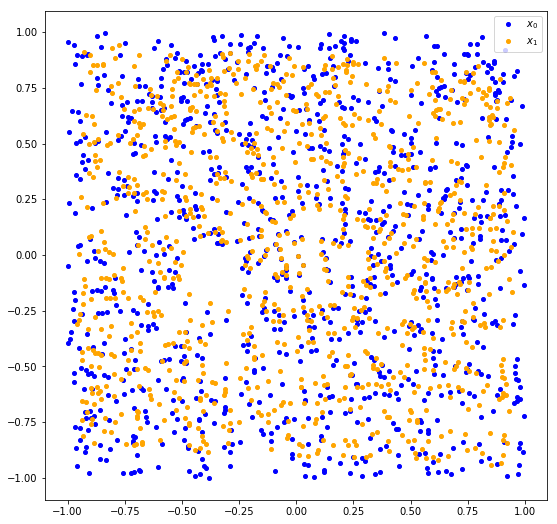

In [11]:
X0= get_data_matrix('linear_vectorfield_data_x0.txt')
X1= get_data_matrix('linear_vectorfield_data_x1.txt')

plt.figure(figsize=(9,9))
plt.plot(X0.T[0],X0.T[1],'bo', linestyle=' ', markersize=4)
plt.plot(X1.T[0],X1.T[1],'o',color='orange', linestyle=' ', markersize=4)
plt.legend(['$x_0$', '$x_1$'])

### Visualise the estimated vector field

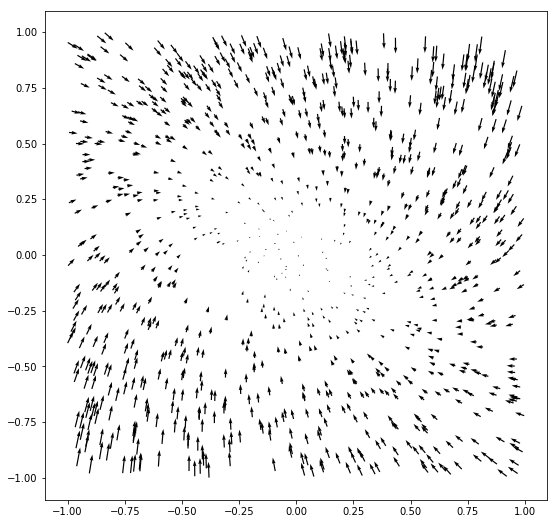

In [12]:
V_hat = (X1 - X0)
plt.figure(figsize=(9,9))
plt.quiver(X0.T[0], X0.T[1], V_hat.T[0], V_hat.T[1])

### Approximate the vector field linearly and compute the mean squared error between the estimated data and the ground truth

mean squared error: 0.0019758517870738126


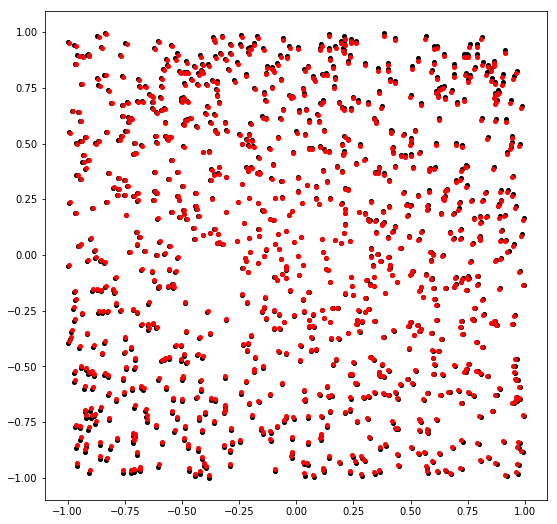

In [13]:
A = np.linalg.lstsq(X0,V_hat,rcond=None)[0]
X1_hat = euler(0.1, X0, A)
plt.figure(figsize=(9,9))
plt.plot(X0.T[0],X0.T[1],'ko', linestyle=' ', markersize=4)
plt.plot(X1_hat.T[0],X1_hat.T[1],'ro', linestyle=' ', markersize=4)
error = mean_squared_error(X1_hat, X1)
print('mean squared error: {}'.format(error))

### Visualise the trajectory of the point $(10,10)$ and the phase portrait in $[-10,10]^2$

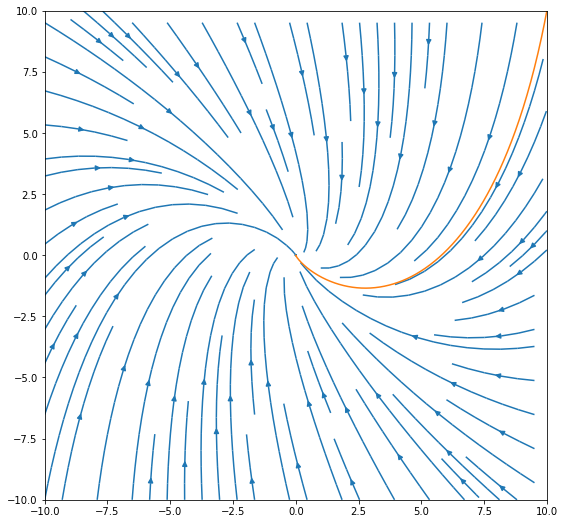

In [14]:
# Width, height and points along axes
w = 10
h = 10
n = 100

# x and y dimensions
x_d = np.linspace(-w, w, n)
y_d = np.linspace(-h, h, n)

# Meshgrid
x, y = np.meshgrid(x_d, y_d)

u,v = phase_portrait(x,y,A)

trajectory = []
x0 = [10, 10]
for i in range(10000):
    trajectory.append(x0)
    x0 = euler(0.1, x0, A)
trajectory = np.asarray(trajectory).T

plt.figure(figsize=(9,9))
plt.streamplot(x, y, u, v, density=1)
plt.plot(trajectory[0], trajectory[1])

# Task 3:

### Visualise the points for x0 and x1

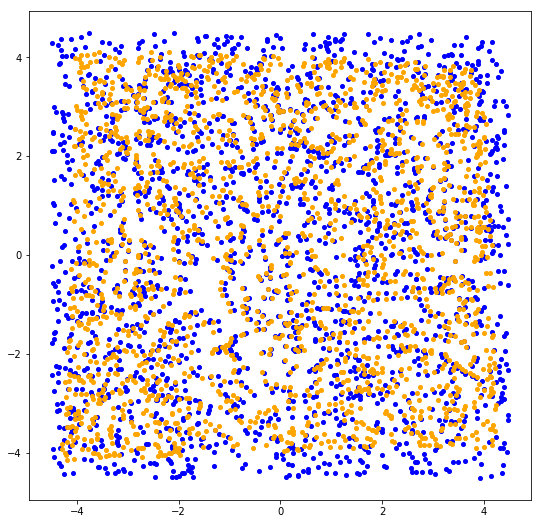

In [15]:
X0= get_data_matrix('nonlinear_vectorfield_data_x0.txt')
X1= get_data_matrix('nonlinear_vectorfield_data_x1.txt')

plt.figure(figsize=(9,9))
plt.plot(X0.T[0],X0.T[1],'bo', linestyle=' ', markersize=4)
plt.plot(X1.T[0],X1.T[1],'o', color='orange', linestyle=' ', markersize=4)

### Find the best $\Delta t$ for the linear approximation

Text(0, 0.5, 'error')

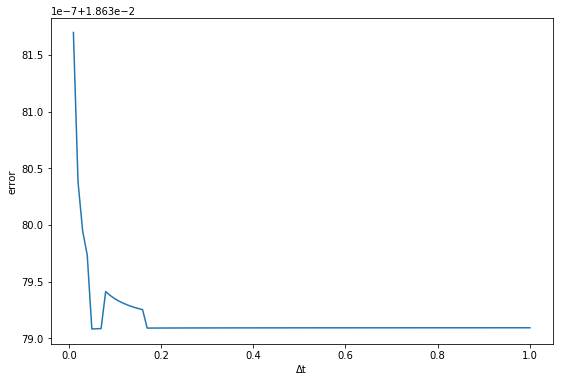

In [16]:
deltas = []
errors = []
epsilone = 0.00001
delta = 0.01
for i in range(100):
    V_hat = (X1 - X0) / delta
    A = np.linalg.lstsq(X0,V_hat, rcond=False)[0]
    X1_hat = euler(epsilone, X0, A)
    for j in range(int(delta/epsilone) -1):
        X1_hat = euler(epsilone, X1_hat, A)
    error = mean_squared_error(X1_hat, X1)
    #print('Delta: ' + str(delta))
    #print('mean squared error: {}'.format(error))
    deltas.append(delta)
    errors.append(error)
    delta = delta +0.01
plt.figure(figsize=(9,6))
plt.plot(deltas,errors)
plt.xlabel('\u0394t')
plt.ylabel('error')

In [17]:
print('\u0394t = ' + str(deltas[np.argmin(np.array(errors))]))
print('Error = ' + str(errors[np.argmin(np.array(errors))]))

Δt = 0.05
Error = 0.018637908107114392


### Approximate the vector field linearly using the best $\Delta t$ and compute the mean squared error between the estimated data and the ground truth

mean squared error: 0.018637908107114392


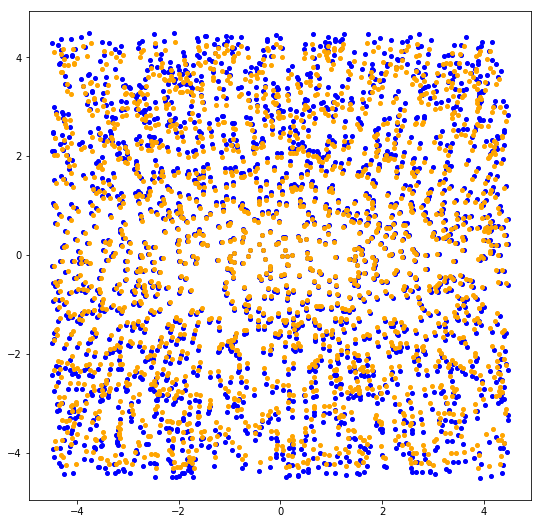

In [18]:
delta = 0.05
V_hat = (X1 - X0) / delta
A = np.linalg.lstsq(X0,V_hat, rcond=False)[0]
X1_hat = euler(epsilone, X0, A)
for i in range(int(delta/epsilone) -1):
    X1_hat = euler(epsilone, X1_hat, A)
plt.figure(figsize=(9,9))
plt.plot(X0.T[0],X0.T[1],'bo', linestyle=' ', markersize=4)
plt.plot(X1_hat.T[0],X1_hat.T[1],'o', color='orange', linestyle=' ', markersize=4)
error = mean_squared_error(X1_hat, X1)
print('mean squared error: {}'.format(error))

### Find the best $\Delta t$ for the non-linear approximation

Text(0, 0.5, 'error')

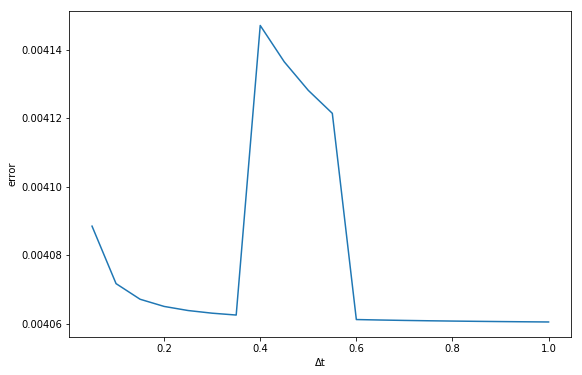

In [19]:
deltas = []
errors = []
epsilone = 0.01
delta = 0.05
indexes = np.random.choice(X0.shape[0], 100, replace=False)
elements = X0[indexes]
for i in range(20):
    V_hat = (X1 - X0) / delta
    T = transforme_matrix(X0, elements, 0.5).T
    A = np.linalg.lstsq(T,V_hat, rcond=False)[0]
    X1_hat = euler_transform(epsilone, X0, A, elements)
    for j in range(int(delta/epsilone) -1):
        X1_hat = euler_transform(epsilone, X1_hat, A, elements)
    error = mean_squared_error(X1_hat, X1)
    #print('Delta: ' + str(delta))
    #print('mean squared error: {}'.format(error))
    deltas.append(delta)
    errors.append(error)
    delta = delta +0.05
plt.figure(figsize=(9,6))
plt.plot(deltas,errors)
plt.xlabel('\u0394t')
plt.ylabel('error')

In [20]:
print('\u0394t = ' + str(deltas[np.argmin(np.array(errors))]))
print('Error = ' + str(errors[np.argmin(np.array(errors))]))

Δt = 1.0000000000000002
Error = 0.00406049145861784


### Approximate the vector field non-linearly using the best $\Delta t$ and compute the mean squared error between the estimated data and the ground truth

0.0031376333231674333


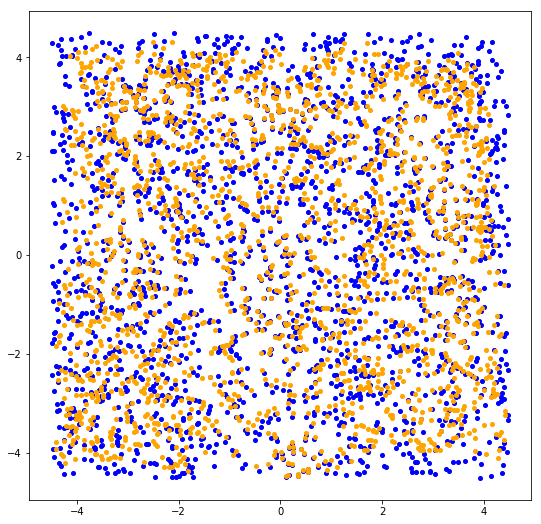

In [21]:
epsilone = 0.01
delta = 1
indexes = np.random.choice(X0.shape[0], 100, replace=False)
elements = X0[indexes]
V_hat = (X1 - X0) / delta
T = transforme_matrix(X0, elements, 0.5).T
A = np.linalg.lstsq(T,V_hat, rcond=False)[0]
X1_hat = euler_transform(epsilone, X0, A, elements)
for j in range(int(delta/epsilone) -1):
    X1_hat = euler_transform(epsilone, X1_hat, A, elements)
error = mean_squared_error(X1_hat, X1)
plt.figure(figsize=(9,9))
plt.plot(X0.T[0],X0.T[1],'bo', linestyle=' ', markersize=4)
plt.plot(X1_hat.T[0],X1_hat.T[1],'o', color='orange', linestyle=' ', markersize=4)
print(error)

### Solve the system further for larger t and visualise the data points

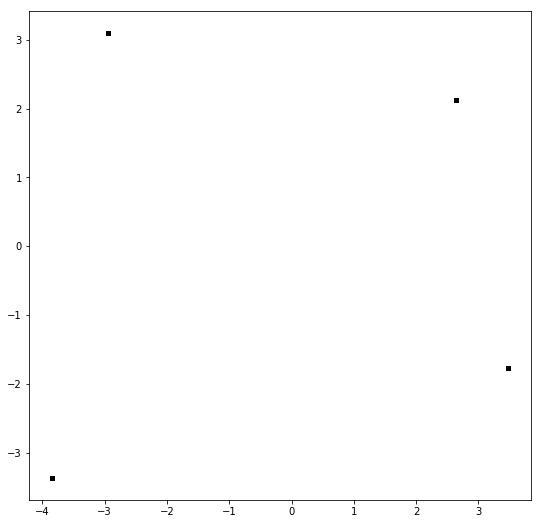

In [31]:
epsilone = 1
delta = 300
X1_hat = euler_transform(epsilone, X0, A, elements)
for i in range(int(delta/epsilone) -1):
    X1_hat = euler_transform(epsilone, X1_hat, A, elements)
plt.figure(figsize=(9,9))
plt.plot(X1_hat.T[0],X1_hat.T[1],'o', color='black', linestyle=' ', markersize=4)